# 📖 Import Library 

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling numerical features

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score  

# 💻 Load in data

In [3]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [5]:
df.shape

(8863, 34)

In [7]:
df.dtypes

game_id              object
hand_id               int64
round                object
player_name          object
action               object
amount                int64
hole_cards           object
community_cards      object
pot                   int64
player_stack          int64
small_blind           int64
big_blind             int64
winner               object
card1                object
card2                object
card1_suit            int64
card1_rank            int64
card2_suit            int64
card2_rank            int64
community1_rank       int64
community1_suit       int64
community2_rank       int64
community2_suit       int64
community3_rank       int64
community3_suit       int64
community4_rank       int64
community4_suit       int64
community5_rank       int64
community5_suit       int64
poker_hand            int64
bet_to_pot_ratio    float64
aggression          float64
action_label          int64
round_label           int64
dtype: object

In [62]:
# Set up X
X = df[['round_label', 'pot', 'player_stack', 'small_blind', 'big_blind', 
        'poker_hand', 'card1_rank', 'card2_rank', 'community1_rank', 
        'community2_rank', 'community3_rank', 'community4_rank', 
        'community5_rank', 'community1_suit', 'community2_suit', 'community3_suit', 
        'community4_suit', 'community5_suit', 'bet_to_pot_ratio', 'aggression']]

y = df['action_label']  # Target variable

# One-hot encode the target variable
y_encoded = to_categorical(y, num_classes=3)  # 3 classes: Call, Raise, Fold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the scaler on the training data and transform
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train) # Avoid data leakage 
X_test_sc = scaler.transform(X_test)

# Define the Neural Network
model = Sequential([
    Input(shape=(X_train_sc.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # First hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train_sc, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test_sc)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoding back to class labels

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5022 - loss: 0.9741 - val_accuracy: 0.7786 - val_loss: 0.5648
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.7386 - loss: 0.5690 - val_accuracy: 0.7976 - val_loss: 0.4623
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7783 - loss: 0.4898 - val_accuracy: 0.7849 - val_loss: 0.4316
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7789 - loss: 0.4672 - val_accuracy: 0.7997 - val_loss: 0.4189
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7852 - loss: 0.4458 - val_accuracy: 0.8039 - val_loss: 0.4170
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7804 - loss: 0.4469 - val_accuracy: 0.7927 - val_loss: 0.4077
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7999 - loss: 0.4233 - val_accuracy: 0.8075 - val_loss: 0.4107
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7891 - loss: 0.4350 - va

In [64]:
# Display results
print("Neural Network Accuracy:", accuracy_score(y_test_labels, y_pred))
print("Classification Report:\n", classification_report(y_test_labels, y_pred))

Neural Network Accuracy: 0.8324873096446701
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       622
           1       0.88      0.87      0.87       737
           2       0.86      0.87      0.87       414

    accuracy                           0.83      1773
   macro avg       0.83      0.83      0.83      1773
weighted avg       0.83      0.83      0.83      1773



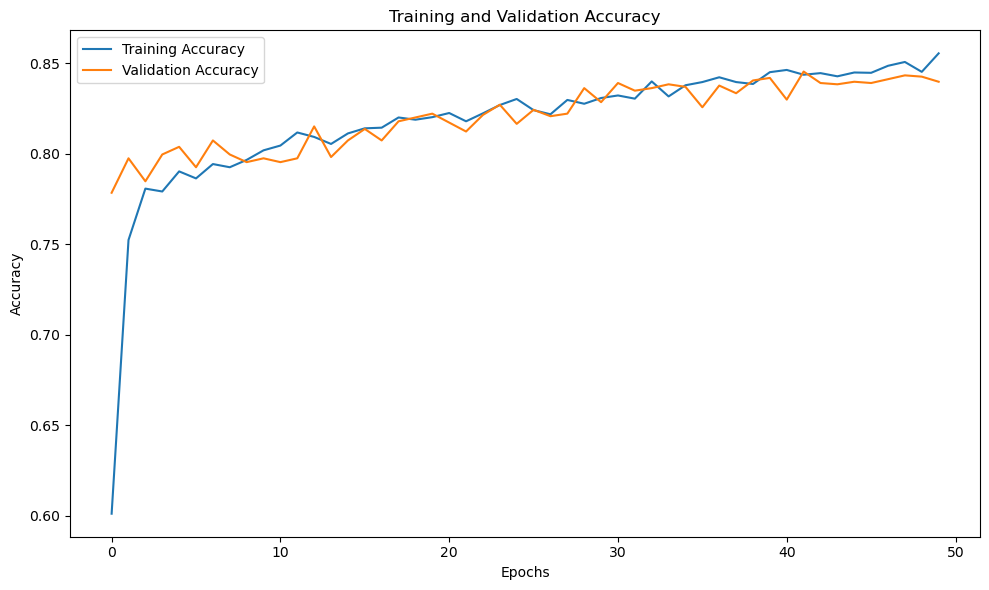

In [90]:
# Plot training and validation accuracy 

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show();


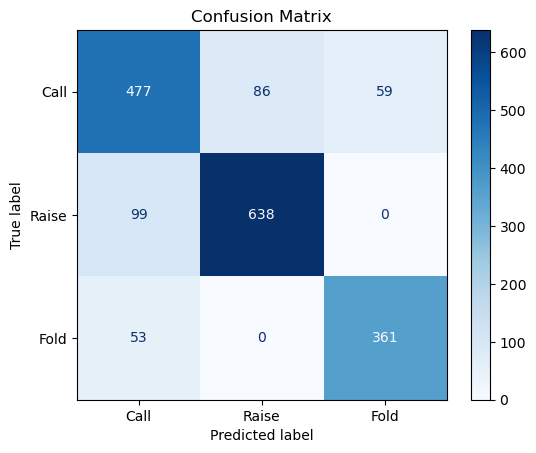

In [120]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Call', 'Raise', 'Fold'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## 📝 How Neural Network Perform?

1. **Overall Accuracy:** The overall accuracy of the Neural Network is **83%**.

2. **Performance Metrics for Each Class**:
   - **Class 0 (Call)**:
     - **Precision**: Out of all the instances predicted as "Call," 76% were correct.
     - **Recall**: Out of all actual "Call" instances, 77% were correctly identified by the model.
     - **F1-score**: The balance between precision and recall is good at 76%, though not perfect for this class.

   - **Class 1 (Raise)**:
     - **Precision**: Out of all the instances predicted as "Raise," 88% were correct.
     - **Recall**: Out of all actual "Raise" instances, 87% were correctly identified by the model.
     - **F1-score**: This is the best performance among the three classes at 87%, suggesting the model is highly effective at identifying "Raise" actions.

   - **Class 2 (Fold)**:
     - **Precision**: Out of all the instances predicted as "Fold," 86% were correct.
     - **Recall**: Out of all actual "Fold" instances, 87% were correctly identified by the model.
     - **F1-score**: Similar to Class 1, the performance is strong at 87% for predicting "Fold."

   - **Macro Average**: 83%: This is the average of precision, recall, and F1-score across all classes, indicating that the model performs consistently across different classes.
  
   - **Weighted Average**: 83%: This metric considers the number of samples in each class, confirming that the model performs equally well even when accounting for class imbalances.

3. **Comparison with Other Models**:
   - **Logistic Regression Accuracy (80%)**: The Logistic Regression model has the lowest accuracy among the three models. However, it still performs reasonably well, especially considering it's a simpler model compared to the Neural Network and Random Forest.
   - **Random Forest Accuracy (85%)**: The Random Forest model performs slightly better than the Neural Network (85% vs. 83%). However, the large gap between the train and test accuracy scores for the Random Forest model indicates overfitting.
   - **Neural Network**: The Neural Network shows good overall performance with decent precision and recall for all classes, especially for "Raise" and "Fold." Additionally, it does not exhibit signs of overfitting or underfitting.